# Market Basket Analysis using Apriori Algorithm

In [16]:
# importing libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Importing CSV file containing Grocery sales data
df = pd.read_csv(r"C:\Users\ESE\Downloads\Market Basket Analysis - Groceries_dataset.csv")
df.head()

,Member_number,Date,Item_description
0,1808,21/07/2015,tropical fruit
1,2552,01/05/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,02/01/2015,whole milk


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Member_number     38765 non-null  int64 
 1   Date              38765 non-null  object
 2   Item_description  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Before we perform market basket analysis, we need to convert this data into a format that can easily be ingested into the Apriori algorithm. In other words, we need to turn it into a tabular structure comprising ones and zeros

In [19]:
# first group items that have the same member_number and date
df['Single_transaction'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)

df.head()

,Member_number,Date,Item_description,Single_transaction
0,1808,21/07/2015,tropical fruit,1808_21/07/2015
1,2552,01/05/2015,whole milk,2552_01/05/2015
2,2300,19/09/2015,pip fruit,2300_19/09/2015
3,1187,12/12/2015,other vegetables,1187_12/12/2015
4,3037,02/01/2015,whole milk,3037_02/01/2015


The 'Single_transaction' variable combines the member number, and date, and tells us the item purchased in one receipt.

In [20]:
 # Pivoting this table to convert the items into columns and the transaction into rows
 # Cross-tabulation is a way of creating a table that shows how many times each item appears in each unique transaction
df2 = pd.crosstab(df['Single_transaction'], df['Item_description'])
 
df2.head()

Item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15/03/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24/06/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24/07/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25/11/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27/05/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# function converts each element to 1 if its value is greater than 0, otherwise to 0
# This is often done in the context of association rule mining, where binary values (1 or 0) represent the presence or absence of an item in a transaction
apriori_df = df2.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\ESE\AppData\Local\Temp\ipykernel_388\3051915993.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  apriori_df = df2.applymap(lambda x: 1 if x > 0 else 0)


In [28]:
apriori_df

Item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15/03/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24/06/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24/07/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25/11/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27/05/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_24/01/2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4999_26/12/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_02/10/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Applying the Apriori algorithm to generate frequently-bought-together-items from the binary-encoded DataFrame 'apriori_df'
# The 'min_support' parameter is set to 0.005, indicating the minimum support threshold for an itemset to be considered frequent
# 'use_colnames=True' ensures that item names are used instead of column indices in the resulting DataFrame
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

c:\Users\ESE\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
2,(canned beer),(whole milk),0.046916,0.157923,0.006015,0.128205,0.811821,-0.001394,0.965912,-0.195630
3,(whole milk),(canned beer),0.157923,0.046916,0.006015,0.038087,0.811821,-0.001394,0.990822,-0.215852
4,(whole milk),(citrus fruit),0.157923,0.053131,0.007151,0.045281,0.852259,-0.001240,0.991778,-0.170718


Here, the “antecedents” and “consequents” columns show items that are frequently purchased together.
The first row of the dataset tells us that if a person were to buy bottled water, then they are also likely to purchase whole milk.

In [31]:
#To get the most frequent item combinations in the entire dataset, let’s sort the dataset by support, confidence, and lift:

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
26,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
43,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
42,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
16,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
17,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


The resulting table shows that the four most popular product combinations that are frequently bought together are:
Rolls and milk
Yogurt and milk
Sausages and milk
Soda and vegetables
One reason for this could be that the grocery store ran a promotion on these items together or displayed them within the same line of sight to improve sales.

In [34]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Zhang's metric is used to visualize this data because it combines support, confidence, and lift into a single measure.

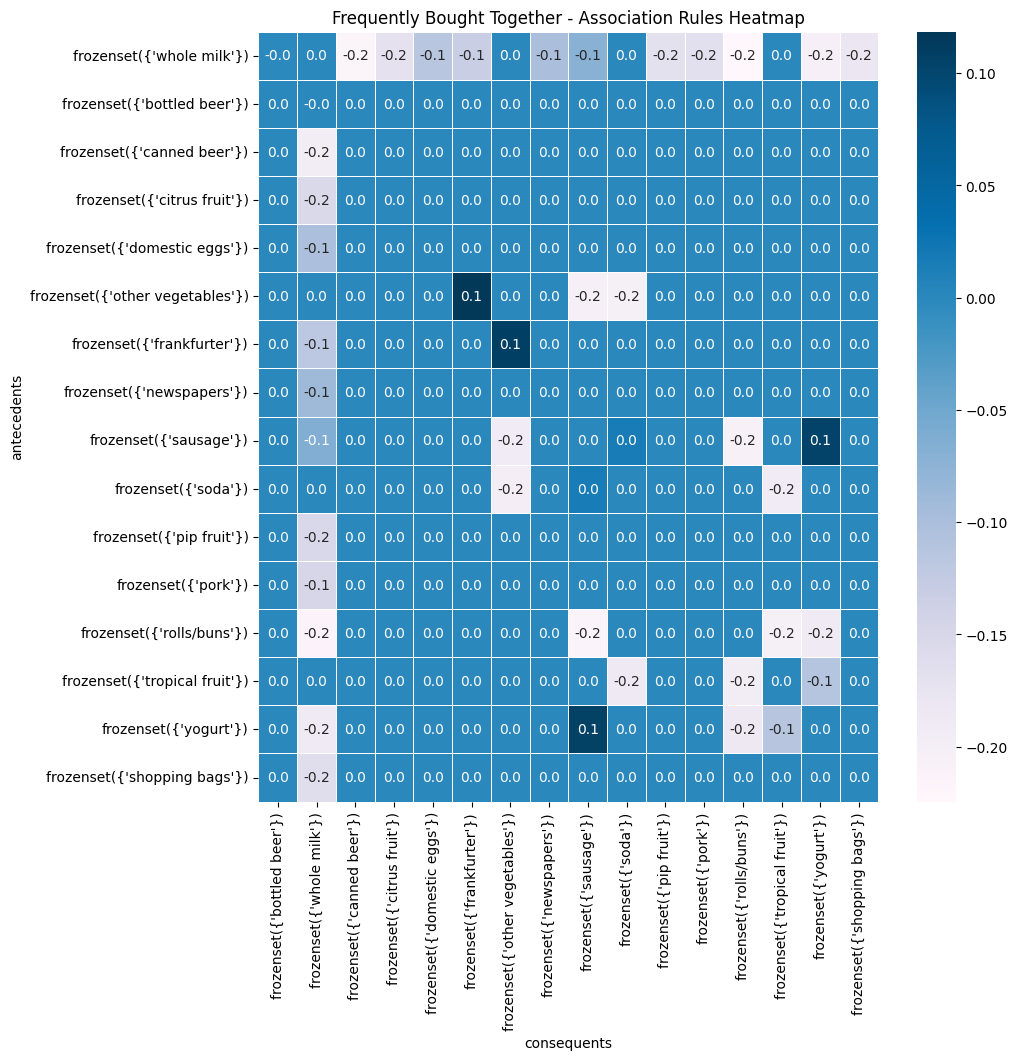

In [33]:
# Creating a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(product_associations, annot=True, cmap='PuBu', fmt='.1f', linewidths=.5)
plt.title('Frequently Bought Together - Association Rules Heatmap')
plt.show()

In [ ]:
# Zhang's metric is seen to be negative.
# This is showing a situation where having one item in a purchase makes it less likely for another item to be bought, compared to what we would normally expect in a positive Zhang's metric 